In [2]:

import pandas as pd
import numpy as np
import datetime as datetime
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:/Users/ramil/Documents/UBA/(75.06) Organización de Datos/TPS/TP1/Entrenamieto_ECI_2020.csv')

# Cantidad de impuesto por Territorio

In [4]:
total_pagado_territorio = df[['Territory', 'Total_Amount', 'Total_Amount_Currency', 'Total_Taxable_Amount', 'Total_Taxable_Amount_Currency']]
total_pagado_territorio = total_pagado_territorio.loc[total_pagado_territorio['Territory'] != 'None']
total_pagado_territorio

,Territory,Total_Amount,Total_Amount_Currency,Total_Taxable_Amount,Total_Taxable_Amount_Currency
2,NW America,83865.60,USD,83865.6,USD
3,NW America,7421881.50,USD,7421881.5,USD
4,NW America,13357192.50,USD,13357192.5,USD
5,NW America,14838277.50,USD,14838277.5,USD
6,NW America,2659494.60,USD,2659494.6,USD
...,...,...,...,...,...
16942,Austria,103350.00,EUR,299715.0,EUR
16943,Austria,93015.00,EUR,299715.0,EUR
16944,Austria,103350.00,EUR,299715.0,EUR
16945,NE America,2346796.88,USD,0.0,USD


Elimino aquellas filas que posean un precio final menor o igual a 0

In [5]:
total_pagado_territorio = total_pagado_territorio.loc[total_pagado_territorio['Total_Taxable_Amount'] > 0.0]
total_pagado_territorio

,Territory,Total_Amount,Total_Amount_Currency,Total_Taxable_Amount,Total_Taxable_Amount_Currency
2,NW America,83865.6,USD,83865.6,USD
3,NW America,7421881.5,USD,7421881.5,USD
4,NW America,13357192.5,USD,13357192.5,USD
5,NW America,14838277.5,USD,14838277.5,USD
6,NW America,2659494.6,USD,2659494.6,USD
...,...,...,...,...,...
16940,NE America,10751580.0,USD,21332500.0,USD
16941,NE America,10580920.0,USD,21332500.0,USD
16942,Austria,103350.0,EUR,299715.0,EUR
16943,Austria,93015.0,EUR,299715.0,EUR


In [6]:
impuesto = (total_pagado_territorio['Total_Taxable_Amount'] - total_pagado_territorio['Total_Amount'])/total_pagado_territorio['Total_Taxable_Amount']

Agrego el impuesto agregado al dataframe

In [7]:
total_pagado_territorio['Impuesto_agregado_porcentual'] = impuesto
total_pagado_territorio

<ipython-input-7-745a0745c0a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_pagado_territorio['Impuesto_agregado_porcentual'] = impuesto


,Territory,Total_Amount,Total_Amount_Currency,Total_Taxable_Amount,Total_Taxable_Amount_Currency,Impuesto_agregado_porcentual
2,NW America,83865.6,USD,83865.6,USD,0.000000
3,NW America,7421881.5,USD,7421881.5,USD,0.000000
4,NW America,13357192.5,USD,13357192.5,USD,0.000000
5,NW America,14838277.5,USD,14838277.5,USD,0.000000
6,NW America,2659494.6,USD,2659494.6,USD,0.000000
...,...,...,...,...,...,...
16940,NE America,10751580.0,USD,21332500.0,USD,0.496000
16941,NE America,10580920.0,USD,21332500.0,USD,0.504000
16942,Austria,103350.0,EUR,299715.0,EUR,0.655172
16943,Austria,93015.0,EUR,299715.0,EUR,0.689655


Acá vemos aquellos territorios que no aplican impuesto alguno

In [8]:
cant_impuesto = total_pagado_territorio.groupby('Territory').agg({'Impuesto_agregado_porcentual':'max'})
cant_impuesto.sort_values('Impuesto_agregado_porcentual', ascending = True).head(25)

,Impuesto_agregado_porcentual
Territory,
Albania,0.000000
Morocco,0.000000
Lebanon,0.000000
Kuwait,0.000000
Kosovo,0.000000
Oman,0.000000
Romania,0.000000
Slovenia,0.000000
Solomon Islands,0.000000


In [9]:
territorios_sin_impuesto = cant_impuesto.loc[cant_impuesto['Impuesto_agregado_porcentual'] == 0]
territorios_sin_impuesto

,Impuesto_agregado_porcentual
Territory,
Albania,0.0
Bulgaria,0.0
Burma,0.0
Cambodia,0.0
Croatia,0.0
Czech Republic,0.0
Egypt,0.0
Georgia,0.0
Kosovo,0.0


In [10]:
impuesto_por_territorio = total_pagado_territorio.groupby(['Territory', 'Total_Taxable_Amount_Currency']).agg({'Impuesto_agregado_porcentual':'mean'})

In [11]:
impuesto_por_territorio = impuesto_por_territorio.reset_index()



Text(0.5, 1.0, 'Porcentajes más grandes de impuesto según el territorio')

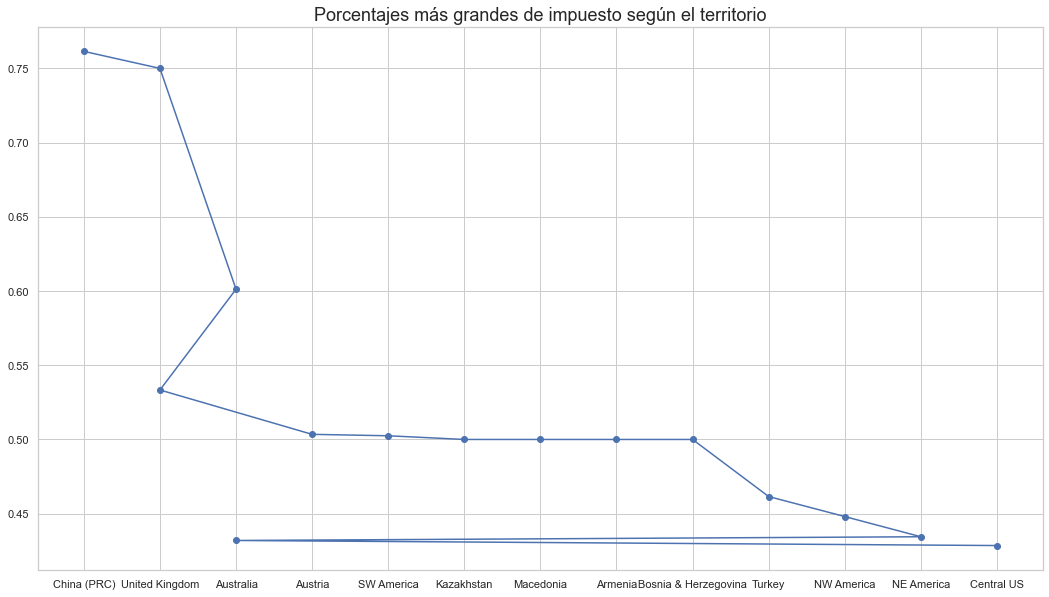

In [21]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (18, 10)
plt.plot( 'Territory', 'Impuesto_agregado_porcentual', data=impuesto_por_territorio.sort_values('Impuesto_agregado_porcentual', ascending = False).head(15), linestyle='-', marker='o')
plt.title('Porcentajes más grandes de impuesto según el territorio', fontsize = 18)

In [100]:
impuesto_por_territorio.loc[impuesto_por_territorio['Territory'] == 'United Kingdom']

,Territory,Total_Taxable_Amount_Currency,Impuesto_agregado_porcentual
94,United Kingdom,EUR,0.258738
95,United Kingdom,GBP,0.750000
96,United Kingdom,USD,0.533333


Se puede ver que la repetición de territorios se debe a la diferencia de impuesto con diferentes monedas

In [12]:
impuesto_por_territorio.loc[impuesto_por_territorio['Territory'] == 'Germany']

,Territory,Total_Taxable_Amount_Currency,Impuesto_agregado_porcentual
27,Germany,EUR,0.358365
28,Germany,USD,0.352941
